# Feature Representation

The format we receive real world data in varies greatly and often needs to be modified before it can be used in machine learning models. The date must often be transformed to create a **representation** of the data which can be used.  

Representing features optimally is the most important technical task in most machine learning problems. It is where practitioners of machine learning spend most of their time and it often has _the largest impact on performance_ of anything you can do.


Data comes in many types:
 
* real valued numbers : petal length
* Categorical data: species name
* constrained data: like ratios or compositional data 


## Real-world data is messy

 For example lets think about a classifier that identified genes involved in resisting a plant disease
 
 If the gene is involved it has a label=1. If it is not involved its label label=0.
 
 It has the following traits:
 
feature | type  | example
-------|--------|-------
functional category | String | "K00680"
gc_content | int between 1,0 | 0.56
length| positive int | 1901
identified promoter | Boolean | true
intron length | positive int | 300
 
 ```
 0:{functional_category: "K00680",
    gc_content: 0.56,
    length: 1901,
    identified_promoter: True,
    intron_length: 300
    }
 ```
 
 ### Encoding Strings with one hot encoding

In the first example the functional category essentially a level in a factor variable.  A common way to encode this in machine learning is the **_one hot encoding_**.

Each unique string in a dataset is given a position in a feature vector and assigned a 1 if it is present.

possible functional categories
```
categories = ["K00001", "k00456", "K00680", ...]
example    = [    0  ,    0   ,    1   , ...]
```

The vector for this example would be:

 ```
 0:{functional_category: [0,0,1],
    gc_content: 0.56,
    length: 1901,
    identified_promoter: True,
    intron_length: 300
    }
```

A one hot vector can get really long, but don't worry, we can encode that long vector as a sparse vector that doesn't take up too much memory.



In [97]:
from sklearn import preprocessing


# create dataset with two categorical vaiables: Genus and health"

X = [['Zea', 'healthy'], ['Arabidopsis', 'healthy'], ['Glycine', 'diseased']]

# Create an encoder for the data
enc = preprocessing.OneHotEncoder()
# Fit the encoder to the data (this tells it to make 3 categories for Genue and two for health)
enc.fit(X)  

# now thrasnform the same data into a sparse vector with one hot encoding 
sparse_vect = enc.transform([['Zea', 'healthy'], ['Arabidopsis', 'healthy'], ['Glycine', 'diseased']])

# verify what that sparse vector look like
sparse_vect.toarray()

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.]])

### Numeric values

* Numeric values both integer and real care already in a form that can be user as features in a ML model.

* Be careful though, sometimes a number is really just a label. Suppose we had trimmed the "K" prefix off our functional category features.  Now our feature would be `00680`, an integer which corresponds to a N'acyltransferase enzyme in the KEGG gene ontology.  That has nothing to do with `00681` which is a  glutathione hydrolase enzyme.  In this case we need to use one hot encoding.

** Does it mater that these numeric values are in different number spaces (real, integer, constrained? **

Yes, it does.  Often data needs to be standardized or binned to make it easer to learn.

### Putting it together encoding this example:

```{python}

0: [0.0, 0.0 ,1.0 , 0.56, 1901, 1, 300 ]
```

## What makes a good feature?

1. It should be non-zero more than a few times. If there are not many examples of it in the training data then it isn't of much value in learning 

2. Represent the values in a way that makes sense to humans if possible. This make's troubleshooting easier 

3. Don't use magic values as flags. For example sdon't use -1 to indicate that there were no introns in the sample above

# Cleaning up data 


The old adage "Garbage in, garbage out" very much applies to machine learning. Much of the work of the data scientist is data cleaning.

Most data cleaning starts with data visualization.  IF the feature space is not too large the distribution of of each variable can show outliers. Reduced representations of data such as PCA can show outliers in high dimension data sets/

There are a number of tools for cleaning data including

* [Open Refine](http://openrefine.org/) see [this tutorial](https://datacarpentry.org/OpenRefine-ecology-lesson/00-getting-started/)


Once outliers have been removed you need to evaluate the need for data transformation and standardization.

Some menthods like Random forest classifiers (covered later) do not need data to fit a particular distribution. Other methods like Logistic regression work better it the data is transformed and standardized.



## Transformation

Data Transformation map numbers from one space to another space.  this can be as simple as applying a transformation function like taking the log of of values.  Or more complex operations can be used.  Lets explore this with some univariate data of a Local alignment search of reads to contigs from a mosquito metagenome.

In [60]:
import pandas
import numpy as np
data = pandas.read_csv("../nb-datasets/testreport.txt", sep="\t", header=None)

Lets plot the e-values.

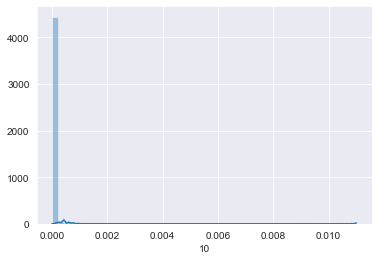

In [61]:
import seaborn as sns
sns.set_style('darkgrid')
evalue = data[10]
sns.distplot(evalue)


As expected , they look pretty clumped up because they are in log space, so lets transform them.

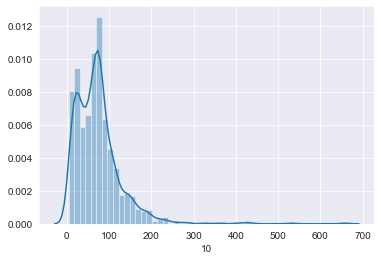

In [62]:

neg_log_eval = -np.log(data[10])
sns.distplot(neg_log_eval)


This looks better but the center is around 100 and he data is a bit skewed.  Many learning methods perform better when the data is more symetrical and scaled similarly across features.  So lets try applying a **_standardization_** to our data. 

Standardization transforms our data into a dataset with a mean of 0 and a standard deviation of 1.

Here is more information from from [Scikit learn](https://scikit-learn.org/stable/modules/preprocessing.html):

"Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data: Gaussian with zero mean and unit variance.

In practice we often ignore the shape of the distribution and just transform the data to center it by removing the mean value of each feature, then scale it by dividing non-constant features by their standard deviation.

For instance, many elements used in the objective function of a learning algorithm (such as the RBF kernel of Support Vector Machines or the l1 and l2 regularizers of linear models) assume that all features are centered around zero and have variance in the same order. If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected.
"


Mean is :4.9737991503207014e-17
SD is :1.0


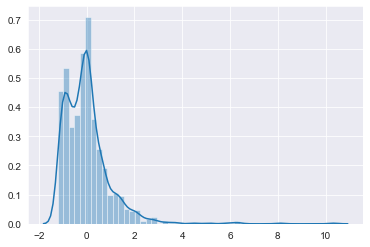

In [63]:
from sklearn import preprocessing
eval_scaled = preprocessing.scale(neg_log_eval)
sns.distplot(eval_scaled)
print("Mean is :" + str(eval_scaled.mean()))
print("SD is :" + str(eval_scaled.std()))

Standardization is usually sufficient even when a population is not normally distributed. But sometimes we want to map data onto a different distribution all together. Quantile transformations and power transformations are available to do this.


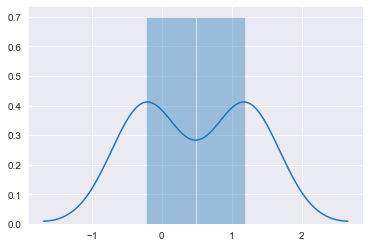

In [83]:
# Create a transformer that uses the Yeo-Johnson transformation
pt = pt = preprocessing.PowerTransformer()

#y = data[10].as_matrix().reshape(1, len(data[10]))
#y
data.iloc[:,10:12]
eval_bc_trans = pt.fit_transform(data.iloc[:,10:12])
sns.distplot(eval_bc_trans[:1])